# Shubham Nigam - 19A1HP071

In [62]:
import pandas as pd #importing library for loading files as data frame
import numpy as np #importing library for arithmatic operations
ad = pd.read_csv(r"C:\Users\Shubham\Downloads\Advertising.csv") #reading the data file as dataframe

In [63]:
ad.info() #checking for data type. Question 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [64]:
ad[ad.Day.isnull()] #Q.2 identifying missing value

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [65]:
ad = ad.dropna(subset = ['Day']) #deleting the row with null value
ad.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [66]:
ad[ad.Day.isnull()] #checking if row with null value is deleted

,Sno,TV,Radio,Newspaper,Day,Sales


In [67]:
ad['Day'].unique() #giving unique value to day column

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [68]:
pd.get_dummies(ad['Day']) #converting  category to indicator variables

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,1,0
198,1,0,0


In [69]:
categorical = ['Day'] # Q.2 creating categorical variable
features = ['TV', 'Radio', 'Newspaper', 'Day'] # creating list of non categorical and independent columns

In [70]:
encoded_ad = pd.get_dummies(ad[features], columns = categorical) #adding categorical columns

In [71]:
encoded_ad.columns #display  columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [72]:
features = encoded_ad.columns
features # making a list of independent columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [73]:
encoded_ad.describe() # Q4 Descriptive summary of all categorical variable

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.020305,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.141399,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,0.000000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,0.000000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,0.000000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000,1.000000


In [74]:
ad['Sales'].describe() # describing summary of sales column

count    197.000000
mean      14.102030
std        5.192302
min        1.600000
25%       10.400000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [75]:
import matplotlib.pyplot as plt # importing libraries for graphs 
import seaborn as sn
%matplotlib inline

In [76]:
import warnings # importing the warning library
warnings.filterwarnings('ignore') # used to ignore the warning given by plot functions

In [77]:
day_sales = ad.groupby('Day')['Sales'].mean().reset_index() # making sales the grouping variable and taking the mean
day_sales

,Day,Sales
0,Holiday,13.175000
1,Weekdays,14.033113
2,Weekend,14.438095


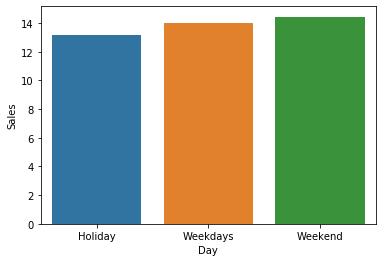

In [78]:
sn.barplot(x = 'Day', y = 'Sales', data = day_sales); #Q4 Bar graph- SALES IS HIGHEST IN THE WEEKENDS

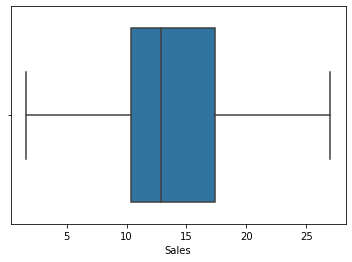

In [79]:
sn.boxplot(ad['Sales']) # box plot - NO OUTLIERS HENCE MEAN AND MEDIAN CAN BE A GOOD INDICATOR FOR ANALYSIS

In [80]:
encoded_ad.head(5)

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend
0,230.1,37.8,69.2,0,0,1
1,44.5,39.3,45.1,0,1,0
2,17.2,45.9,69.3,0,1,0
3,151.5,41.3,58.5,0,1,0
4,180.8,10.8,58.4,0,1,0


In [81]:
import statsmodels.api as sm # importing library
from sklearn.model_selection import train_test_split # importing function to run regression model
X = sm.add_constant(encoded_ad) # constant .
Y = ad['Sales'] # depedent variable
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7, random_state = 74 ) # Q6 splitting the data as train and test in 70:30 ratio

In [82]:
model = sm.OLS(train_y, train_X).fit() #  Q.7 Using ordinary least square model to fit the set
model.summary2() #printing the summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.019  
Dependent Variable: Sales            AIC:                859.1043
Date:               2020-08-12 02:26 BIC:                876.6242
No. Observations:   137              Log-Likelihood:     -423.55 
Df Model:           5                F-statistic:        0.4885  
Df Residuals:       131              Prob (F-statistic): 0.784   
R-squared:          0.018            Scale:              29.670  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          8.5005    1.5789   5.3837  0.0000   5.3770  11.6240
TV             0.0105    0.0077   1.3628  0.1753  -0.0047   0.0257
Radio         -0.0113    0.0337  -0.3346  0.7384  -0.0779   0.0554
Newspaper      0.0068    0.0239   0.2840  0.7768  -0.0406   0.0542
Day_Holiday    1.2597    2.5329   0.4973  0.6198  -3.7510   6.2703
Day_Weekdays   4.7066    1.0180   4.6232  0.0000   2.6927   6.7205
Day_Weekend    2.5342    1.3647   1.8569  0.0656  -0.1656   5.2340
-----------------------------------------------------------------
Omnibus:          5.519   Durbin-Watson:      2.115              
Prob(Omnibus):    0.063   Jarque-Bera (JB):   5.587              
Skew:             0.465   Prob(JB):           0.061              
Kurtosis:         2.660   Condition No.:      2436358462314155008
=================================================================
* The condition number is large (2e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

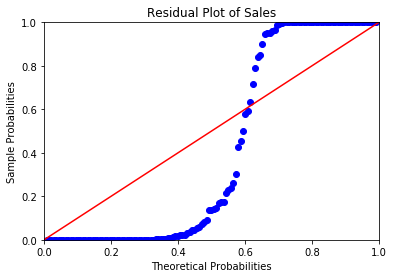

In [83]:
residual = model.resid
probplot = sm.ProbPlot( residual ) #Checking for Normality
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Residual Plot of Sales" )
plt.show()

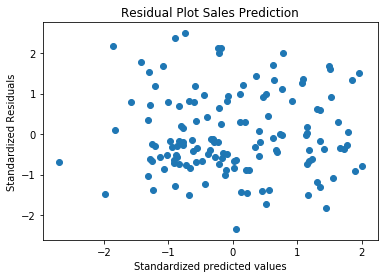

In [84]:
def standardized( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( standardized( model.fittedvalues ), # plotting Test of Homoscedasticity
standardized( residual ) )
plt.title( "Residual Plot Sales Prediction" ); # title label
plt.xlabel( "Standardized predicted values") # x axis
plt.ylabel( "Standardized Residuals"); #y axis

In [85]:
from scipy.stats import zscore
encoded_ad['z_score'] = zscore( ad.Sales )
encoded_ad[ (encoded_ad.z_score > 3.0) | (encoded_ad.z_score < -3.0) ] # checking z score between 3 to -3

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend,z_score


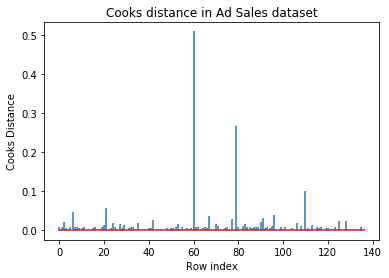

In [86]:
import numpy as np
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Cooks distance in Ad Sales dataset" ); # title label
plt.xlabel( "Row index") # x lable
plt.ylabel( "Cooks Distance"); # y label

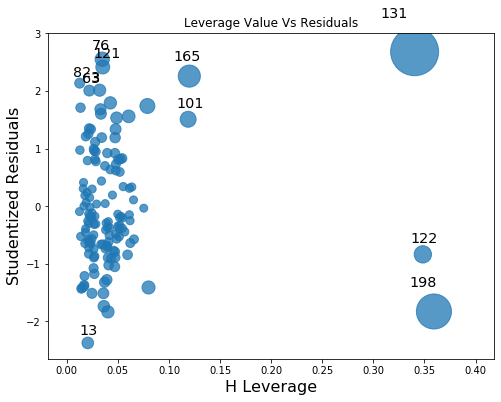

In [87]:
from statsmodels.graphics.regressionplots import influence_plot # importing required libraries
fig, ax = plt.subplots( figsize=(8,6) ) # plotting LVT
influence_plot( model, ax = ax )
plt.title( "Leverage Value Vs Residuals") # giving title to the diagram
plt.show(); # showing the plot

In [88]:
 # Ques 8. RMSE for Validation Data

In [89]:
pred_y = model.predict( test_X )
from sklearn.metrics import mean_squared_error
from sklearn import metrics
np.sqrt(mean_squared_error(test_y, pred_y)) # comparing MSE


4.939961648775789

In [90]:
np.round( metrics.r2_score(pred_y, test_y), 2 )#measuring R square

-38.79

In [91]:
new_features = ["TV","Radio", "Newspaper"] # using only numeric variables

In [92]:
train_X = train_X[new_features]
ad_2 = sm.OLS(train_y, train_X).fit()
ad_2.summary2()
#  this model is much better as r2 is 0.74 means model explains 74%of the variability. 
#also prob of F statistic islow, so model is statistically significant,

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741   
Dependent Variable:     Sales            AIC:                         951.5045
Date:                   2020-08-12 02:26 BIC:                         960.2645
No. Observations:       137              Log-Likelihood:              -472.75 
Df Model:               3                F-statistic:                 131.5   
Df Residuals:           134              Prob (F-statistic):          9.66e-40
R-squared (uncentered): 0.746            Scale:                       59.487  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
TV             0.0404        0.0061      6.6065      0.0000      0.0283      0.0525
Radio          0.1492        0.0432      3.4500      0.0007      0.0636      0.2347
Newspaper      0.0971        0.0314      3.0898      0.0024      0.0349      0.1593
------------------------------------------------------------------------------
Omnibus:                   0.945            Durbin-Watson:               1.852
Prob(Omnibus):             0.624            Jarque-Bera (JB):            0.681
Skew:                      0.166            Prob(JB):                    0.712
Kurtosis:                  3.092            Condition No.:               13   
==============================================================================

"""

In [93]:
sales2 = 10*0.0419 + 5*0.1442 + 2*0.0873  # Q9. Manually calculating sales for 10 tvs 5 radios and 2 newspaper
sales2

1.3146